
FIRST 5 ROWS:
  Item ID Product Name Category           Supplier  Stock Quantity  \
0    I001       Yogurt    Dairy  GreenFarm Produce             404   
1    I002       Butter    Dairy   Global Beverages              14   
2    I003       Muffin   Bakery   Global Beverages             153   
3    I004       Carrot  Produce   Global Beverages             144   
4    I005         Nuts   Snacks        Daily Dairy             464   

   Reorder Level  Unit Price  
0             90        1.97  
1             20       14.93  
2             27       44.16  
3             86        2.75  
4             62       23.25  

MISSING VALUES:
Item ID           0
Product Name      0
Category          0
Supplier          0
Stock Quantity    0
Reorder Level     0
Unit Price        0
dtype: int64


c:\Users\kaviyadividh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\kaviyadividh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\kaviyadividh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\kaviyadividh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to 

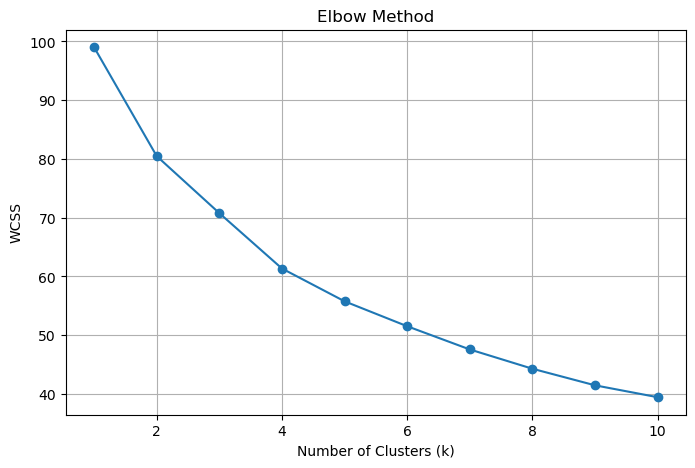


CLUSTERING DONE!
   Category  Supplier  Stock Quantity  Reorder Level  Unit Price  Cluster
0         2         4             404             90        1.97        0
1         2         3              14             20       14.93        2
2         0         3             153             27       44.16        2
3         3         3             144             86        2.75        1
4         4         1             464             62       23.25        1


c:\Users\kaviyadividh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


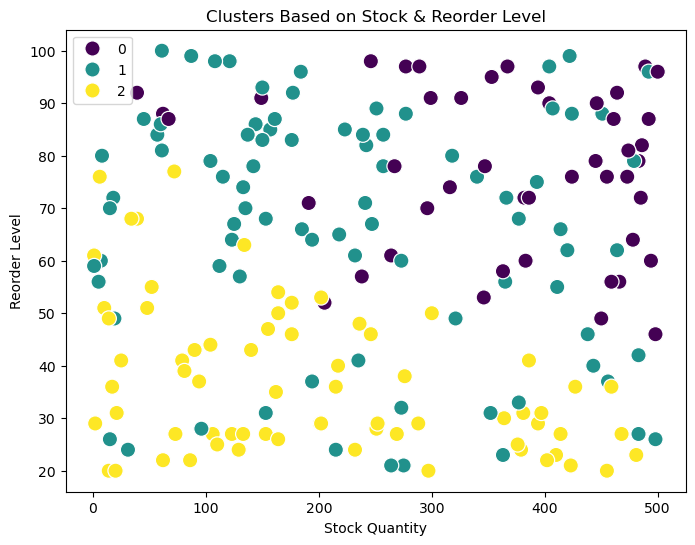


Model and scaler saved successfully!


In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

# ---------------------------------------------------
# 1. Load Dataset
# ---------------------------------------------------
df = pd.read_excel("supermarket_inventory_dataset.xlsx")

print("\nFIRST 5 ROWS:")
print(df.head())

# ---------------------------------------------------
# 2. Check for missing values
# ---------------------------------------------------
print("\nMISSING VALUES:")
print(df.isnull().sum())

# Drop rows with missing values (if any)
df = df.dropna()

# ---------------------------------------------------
# 3. Encode Categorical Columns
# ---------------------------------------------------
df["Category"] = df["Category"].astype("category").cat.codes
df["Supplier"] = df["Supplier"].astype("category").cat.codes

# ---------------------------------------------------
# 4. Drop non-useful columns
# ---------------------------------------------------
df = df.drop(["Item ID", "Product Name"], axis=1)

# ---------------------------------------------------
# 5. Select Features for Clustering
# ---------------------------------------------------
features = ["Stock Quantity", "Reorder Level", "Unit Price", "Category", "Supplier"]
X = df[features]

# ---------------------------------------------------
# 6. Scale the Feature Values
# ---------------------------------------------------
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# ---------------------------------------------------
# 7. Elbow Method to find best K
# ---------------------------------------------------
wcss = []

for k in range(1, 11):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    wcss.append(km.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS")
plt.grid()
plt.show()

# ---------------------------------------------------
# 8. Train K-Means Model with Best K
# ---------------------------------------------------
k = 3  # You can change this based on the elbow graph
kmeans = KMeans(n_clusters=k, random_state=42)
df["Cluster"] = kmeans.fit_predict(X_scaled)

print("\nCLUSTERING DONE!")
print(df.head())

# ---------------------------------------------------
# 9. Visualize Clusters
# ---------------------------------------------------
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=df["Stock Quantity"],
    y=df["Reorder Level"],
    hue=df["Cluster"],
    palette="viridis",
    s=120
)
plt.title("Clusters Based on Stock & Reorder Level")
plt.xlabel("Stock Quantity")
plt.ylabel("Reorder Level")
plt.legend()
plt.show()

# ---------------------------------------------------
# 10. Save Model and Scaler
# ---------------------------------------------------
joblib.dump(kmeans, "kmeans_inventory_model.joblib")
joblib.dump(scaler, "inventory_scaler.joblib")

print("\nModel and scaler saved successfully!")
